In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import confusion_matrix, classification_report, f1_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/onehot_encoding_standard_scaling_data.csv", delimiter=",")
print(df.shape)
df.head()

(5976, 48)


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5976 non-null   float64
 1   MonthlyCharges                           5976 non-null   float64
 2   TotalCharges                             5976 non-null   float64
 3   gender_Female                            5976 non-null   bool   
 4   gender_Male                              5976 non-null   bool   
 5   SeniorCitizen_0                          5976 non-null   bool   
 6   SeniorCitizen_1                          5976 non-null   bool   
 7   Partner_No                               5976 non-null   bool   
 8   Partner_Yes                              5976 non-null   bool   
 9   Dependents_No                            5976 non-null   bool   
 10  Dependents_Yes                           5976 no

In [ ]:
df.columns.unique()

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One_year',
       '

In [ ]:
df.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No_phone_service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber_optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No_internet_service         0
OnlineSecurity_Yes                         0
OnlineBack

In [ ]:
df.isna().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No_phone_service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber_optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No_internet_service         0
OnlineSecurity_Yes                         0
OnlineBack

In [ ]:
df.dtypes

tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                 bool
gender_Male                                   bool
SeniorCitizen_0                               bool
SeniorCitizen_1                               bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No_phone_service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber_optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

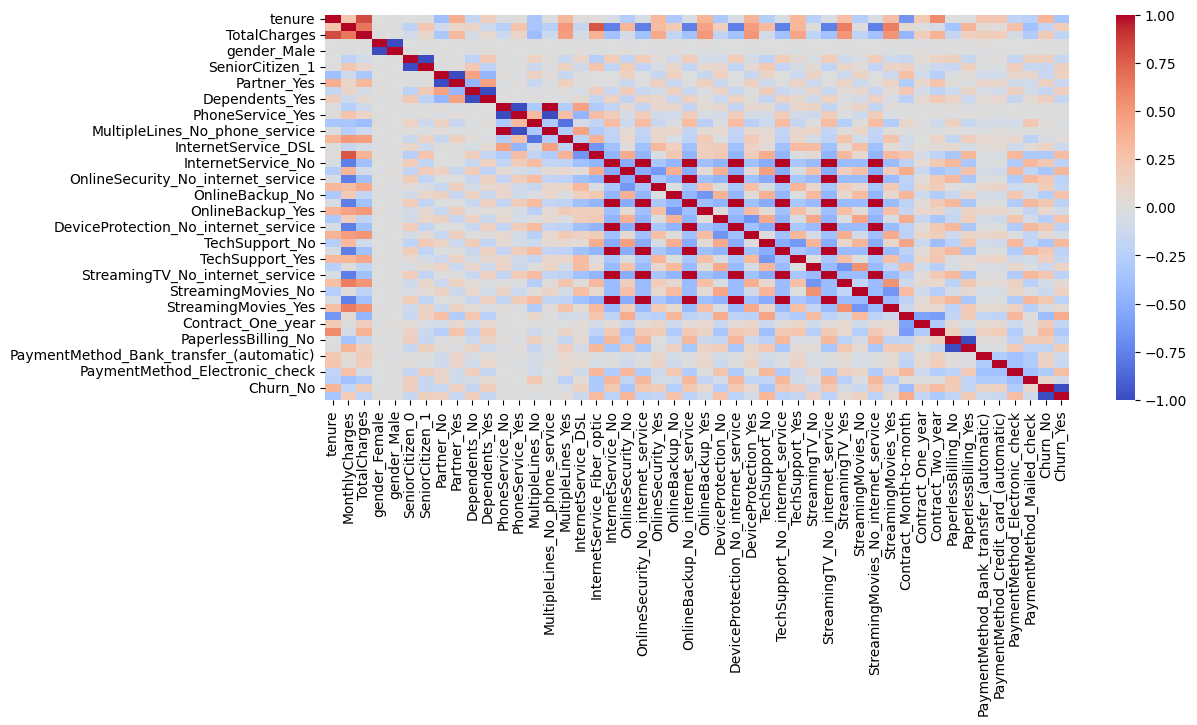

In [ ]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm');

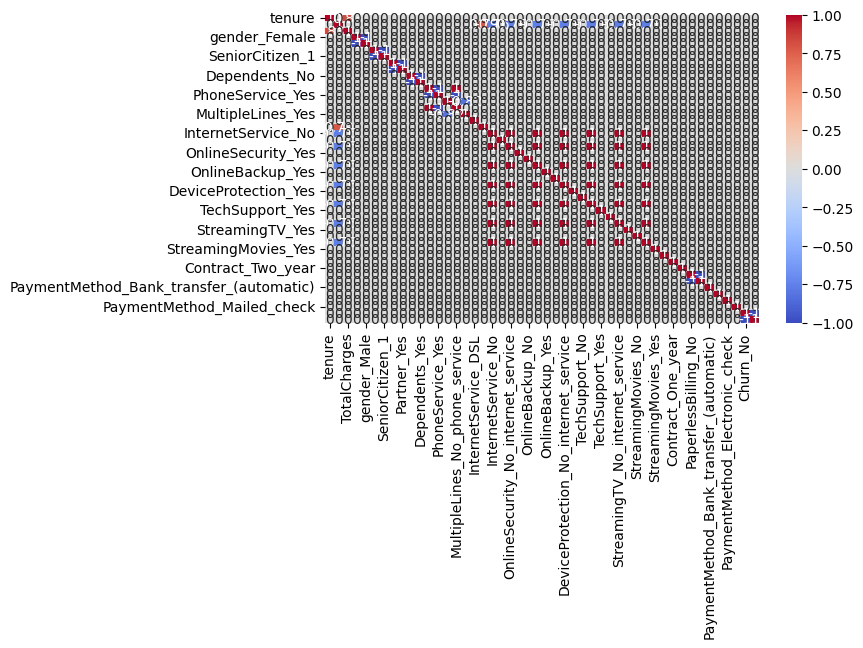

In [ ]:
r = df.corr()
r[abs(r) <= 0.75] = 0
plt.figure(figsize=(7, 4))
sns.heatmap(r, annot=True, cmap='coolwarm');

In [ ]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes
0,1.611381,-1.353483,-0.247769,False,True,True,False,False,True,False,...,False,True,True,False,False,True,False,False,True,False
1,0.468468,0.774066,0.736669,True,False,True,False,True,False,True,...,False,False,False,True,False,True,False,False,True,False
2,0.223558,0.335602,0.251453,True,False,False,True,False,True,True,...,False,False,False,True,True,False,False,False,False,True
3,-1.164265,-0.297182,-0.905725,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,-1.245901,-0.378564,-0.958057,False,True,True,False,True,False,True,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,-1.286719,1.001603,-0.968831,False,True,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True
5972,-0.388717,0.872057,-0.043871,True,False,True,False,False,True,False,...,False,True,False,True,False,True,False,False,True,False
5973,-0.837718,-1.451473,-0.876018,False,True,True,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False
5974,-0.837718,1.149419,-0.482824,False,True,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn_Yes']),
                                                    df['Churn_Yes'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 47), (1793, 47), (4183,), (1793,))

In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features, numeric_features

([],
 ['tenure',
  'MonthlyCharges',
  'TotalCharges',
  'gender_Female',
  'gender_Male',
  'SeniorCitizen_0',
  'SeniorCitizen_1',
  'Partner_No',
  'Partner_Yes',
  'Dependents_No',
  'Dependents_Yes',
  'PhoneService_No',
  'PhoneService_Yes',
  'MultipleLines_No',
  'MultipleLines_No_phone_service',
  'MultipleLines_Yes',
  'InternetService_DSL',
  'InternetService_Fiber_optic',
  'InternetService_No',
  'OnlineSecurity_No',
  'OnlineSecurity_No_internet_service',
  'OnlineSecurity_Yes',
  'OnlineBackup_No',
  'OnlineBackup_No_internet_service',
  'OnlineBackup_Yes',
  'DeviceProtection_No',
  'DeviceProtection_No_internet_service',
  'DeviceProtection_Yes',
  'TechSupport_No',
  'TechSupport_No_internet_service',
  'TechSupport_Yes',
  'StreamingTV_No',
  'StreamingTV_No_internet_service',
  'StreamingTV_Yes',
  'StreamingMovies_No',
  'StreamingMovies_No_internet_service',
  'StreamingMovies_Yes',
  'Contract_Month-to-month',
  'Contract_One_year',
  'Contract_Two_year',
  'Pape

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

In [ ]:
categorical_transformer = Pipeline(steps=[
                                          ("cat_imputer", SimpleImputer(strategy='constant',
                                                                        fill_value='Not Available').set_output(transform="pandas")),
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer

Pipeline(steps=[('cat_imputer',
                 SimpleImputer(fill_value='Not Available',
                               strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
numeric_transformer = Pipeline(steps=[
                                      ("knn_imputer", KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                                      ("scaler", StandardScaler().set_output(transform="pandas"))
                                      ])

numeric_transformer

Pipeline(steps=[('knn_imputer', KNNImputer()), ('scaler', StandardScaler())])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ]).set_output(transform="pandas")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges',
                                  'gender_Female', 'gender_Male',
                                  'SeniorCitizen_0', 'SeniorCitizen_1',
                                  'Partner_No', 'Partner_Yes', 'Dependents_No',
                                  'Dependents_Yes', 'PhoneService_No',
                                  'PhoneService_Yes', 'MultipleLines_No',
                                  'MultipleLin...
                                  'OnlineBackup_No_internet_service',
                                  'OnlineBackup_Yes', 'DeviceProtection_No',
                                  'DeviceProtection_No_internet_service',
                                  'DeviceProtection_Yes', 'TechSupport_No',
                                  'TechSupport_No_internet_service', ...]),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

In [ ]:
pipeline_xgb = Pipeline([("pre_process", preprocessor),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'gender_Female',
                                                   'gender_Male',
                                                   'SeniorCitizen_0',
                                                   'SeniorCitizen_1',
                                                   'Partner_No', 'Partner_Yes',
                                                   'Dependents_No',
                                                   'Dependents_Yes',
                                                   'PhoneService_No',
                                                   'PhoneService_Yes',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
scores = {}
scores['xgb'] = round(f1_score(y_test, y_pred, average='weighted'), 3)

In [ ]:
feature_names = pipeline_xgb['pre_process'].get_feature_names_out()
feature_names

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'num__gender_Female', 'num__gender_Male', 'num__SeniorCitizen_0',
       'num__SeniorCitizen_1', 'num__Partner_No', 'num__Partner_Yes',
       'num__Dependents_No', 'num__Dependents_Yes',
       'num__PhoneService_No', 'num__PhoneService_Yes',
       'num__MultipleLines_No', 'num__MultipleLines_No_phone_service',
       'num__MultipleLines_Yes', 'num__InternetService_DSL',
       'num__InternetService_Fiber_optic', 'num__InternetService_No',
       'num__OnlineSecurity_No',
       'num__OnlineSecurity_No_internet_service',
       'num__OnlineSecurity_Yes', 'num__OnlineBackup_No',
       'num__OnlineBackup_No_internet_service', 'num__OnlineBackup_Yes',
       'num__DeviceProtection_No',
       'num__DeviceProtection_No_internet_service',
       'num__DeviceProtection_Yes', 'num__TechSupport_No',
       'num__TechSupport_No_internet_service', 'num__TechSupport_Yes',
       'num__StreamingTV_No', 'num__StreamingTV_No

In [ ]:
xgb_model = pipeline_xgb['model']
xgb_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
xgb_importances = pd.DataFrame(
    {"feature": feature_names, "importance": np.round(xgb_model.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
num__Churn_No,1.0
num__StreamingMovies_No_internet_service,0.0
num__DeviceProtection_No_internet_service,0.0
num__DeviceProtection_Yes,0.0
num__TechSupport_No,0.0
num__TechSupport_No_internet_service,0.0
num__TechSupport_Yes,0.0
num__StreamingTV_No,0.0
num__StreamingTV_No_internet_service,0.0


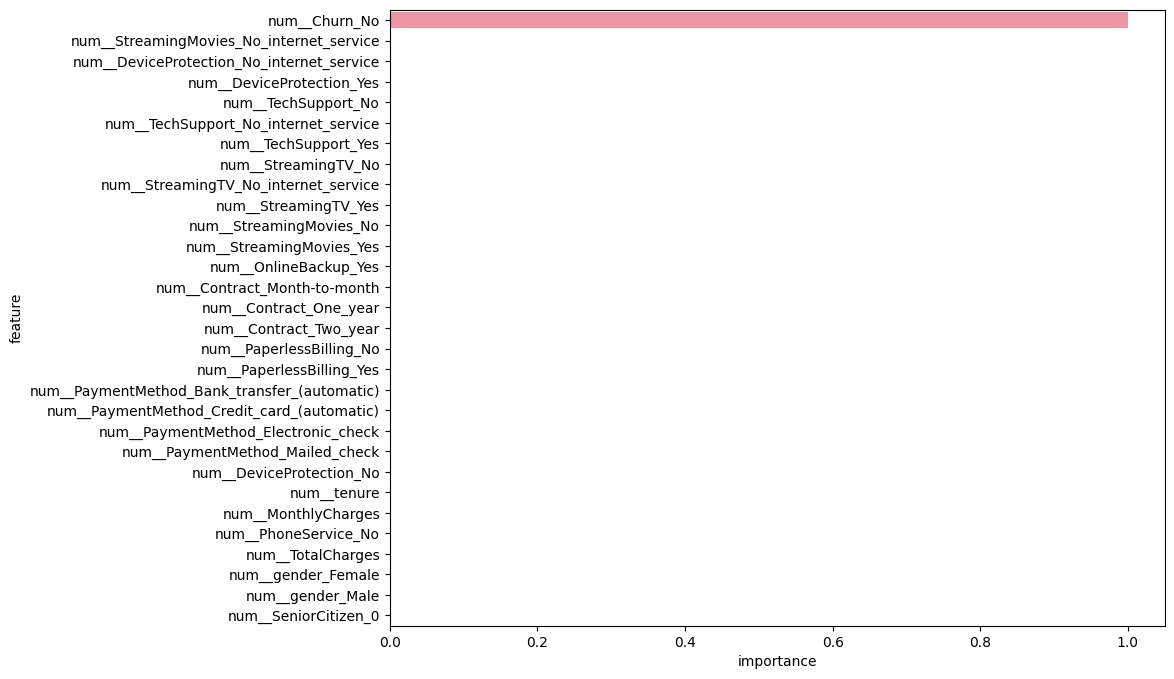

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y=xgb_importances.head(30).index,
            x=xgb_importances.head(30).importance);

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=d89f3296d51515dc383001976a569f54c8d0a883236d29cf121d45125245c9bf
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 984.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=4573a31ddf99d78759f0b7e097de401d61f3898809601a243099c8a0aea9038d
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphus_il0o
  JVM stdout: /tmp/tmphus_il0o/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphus_il0o/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_ppitpf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data = h2o.H2OFrame.from_python(train_data)
train_data['Churn_yes'] = train_data['Churn_Yes'].asfactor()
train_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber_optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No_internet_service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No_internet_service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No_internet_service,DeviceProtection_Yes,TechSupport_No,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,Churn_No,Churn_Yes,Churn_yes
-1.28672,-0.489841,-0.988577,True,False,True,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
-0.919355,0.242594,-0.661325,False,True,True,False,True,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,True,True
-0.266262,1.1843,0.132761,True,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,True,False,False
-0.715263,0.946795,-0.375301,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,True,True
-1.00099,-1.49964,-0.953329,False,True,True,False,False,True,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False
-1.28672,-0.476554,-0.988401,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True
-1.20508,0.159552,-0.913816,False,True,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,True
1.28483,-1.35514,-0.324948,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False
1.24402,0.636216,1.33315,False,True,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False
1.12156,0.82057,1.28989,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False


In [ ]:
aml = H2OAutoML(max_models=30, # hard total models experimented limit
                max_runtime_secs=300, # try to run as many models in 5 mins
                max_runtime_secs_per_model=30, # max training time for a model <= 30 s else move to next model
                seed=1)
aml.train(x=X_train.columns.tolist(), y="Churn_Yes", training_frame=train_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20231222_92923


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 34                          78377                  1            20           13.0882       2             470           178.088

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.01046602214951649
RMSE: 0.10230357838080001
LogLoss: 0.06373981625001952
Mean Per-Class Error: 0.0004889178617992178
AUC: 0.9999976613794354
AUCPR: 0.9999935718357764
Gini: 0.9999953227588707

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4179755846659342
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  3065     3       0.001    (3.0/3068.0)
True   0        1115    0        (0.0/1115.0)
Total  3065     1118    0.0007   (3.0/4183.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.417976     0.998657  196
max f2                       0.417976     0.999462  196
max f0point5                 0.5319       0.99928   192
max accuracy                 0.417976     0.999283  196
max precision                1            1         0
max recall                   0.417976     1         196
max specificity              1            1         0
max absolute_mcc             0.417976     0.998169  196
max min_per_class_accuracy   0.422237     0.999022  195
max mean_per_class_accuracy  0.417976     0.999511  196
max tns                      1            3068      0
max fns                      1            840       0
max fps                      0            3068      399
max tps                      0.417976     1115      196
max tnr                      1            1         0
max fnr                      1            0.753363  0
max fpr                      0            1         399
max tpr                      0.417976     1         196

Gains/Lift Table: Avg response rate: 26.66 %, avg score: 26.57 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0657423                   1                  3.75157  3.75157            1                1            1                           1                   0.246637        0.246637                   275.157  275.157            0.246637
2        0.100167                    0.949744           3.75157  3.75157            1                0.971899     1                           0.990342            0.129148        0.375785                   275.157  275.157            0.375785
3        0.152283                    0.9                3.75157  3.75157            1                0.923389     1                           0.967429            0.195516        0.5713                     275.157  275.157            0.5713
4        0.200096                    0.829667           3.75157  3.75157            1                0.863575     1                           0.942613            0.179372        0.750673                   275.157  275.157            0.750673
5        0.301936                    0.181818           2.44821  3.31196            0.652582         0.562981     0.882819             

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20231222_92923,1,0.0604043,1,0,0.0882128,0.0077815,1297,0.029867,DRF
GBM_2_AutoML_1_20231222_92923,1,3.05225e-17,1,0,1.99863e-16,3.99452e-32,11992,0.24797,GBM
GLM_1_AutoML_1_20231222_92923,1,0.000373204,1,0,0.00053499,2.86215e-07,2523,0.010462,GLM
XGBoost_2_AutoML_1_20231222_92923,1,0.00435103,1,0,0.00562805,3.1675e-05,815,0.004149,XGBoost
GBM_1_AutoML_1_20231222_92923,1,3.45037e-18,1,0,6.26496e-17,3.92497e-33,14325,0.174545,GBM
XGBoost_1_AutoML_1_20231222_92923,1,0.00851724,1,0,0.0107954,0.000116541,1704,0.003559,XGBoost


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1321
        True       1.00      0.96      0.98       472

    accuracy                           0.99      1793
   macro avg       0.99      0.98      0.99      1793
weighted avg       0.99      0.99      0.99      1793



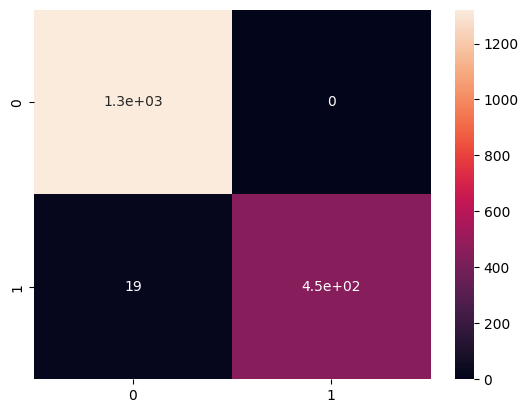

In [ ]:
best_model =  aml.get_best_model(criterion="rmse")
X_test_h2o = h2o.H2OFrame.from_python(X_test)
y_pred = best_model.predict(X_test_h2o)
y_pred = y_pred.as_data_frame()['predict'].values
cf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cf, annot=True);